In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

# read data
player = pd.read_csv("player.csv")
salary = pd.read_csv("salary.csv")
team =  pd.read_csv("team.csv")
fielding = pd.read_csv("fielding.csv")
print(player.shape, salary.shape, team.shape)

(18846, 24) (25575, 5) (2805, 48)


In [2]:
print(player.describe().columns)
d = salary.groupby(["year","league_id"])
d = d.mean()
print()
print(d.head())
d = d.unstack()
print()
print(d.head())
print()
print(d['salary'].head())
print()
print(salary.head())


Index(['birth_year', 'birth_month', 'birth_day', 'death_year', 'death_month',
       'death_day', 'weight', 'height'],
      dtype='object')

                       salary
year league_id               
1985 AL         455597.016949
     NL         500249.317647
1986 AL         402337.867347
     NL         433925.069364
1987 AL         441846.581169

                  salary               
league_id             AL             NL
year                                   
1985       455597.016949  500249.317647
1986       402337.867347  433925.069364
1987       441846.581169  427857.768025
1988       453901.190751  452374.170347
1989       502052.361702  511116.486567

league_id             AL             NL
year                                   
1985       455597.016949  500249.317647
1986       402337.867347  433925.069364
1987       441846.581169  427857.768025
1988       453901.190751  452374.170347
1989       502052.361702  511116.486567

   year team_id league_id  player_id  salary


Text(0.5, 1.0, 'Baseball player salary over years')

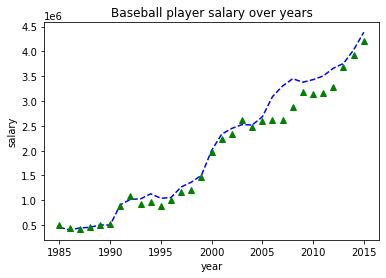

In [4]:
# first, we focus on some general analysis
# salary between leagues and year
import warnings
warnings.filterwarnings('ignore')
data = salary.groupby(["year","league_id"])\
    .mean()\
    .unstack().copy(deep = True)
# see the salary trend
plt.plot(data["salary"]["AL"], 'b--', data["salary"]["NL"], 'g^')
plt.xlabel("year")
plt.ylabel("salary")

plt.title("Baseball player salary over years")


Columns: Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

Index: RangeIndex(start=0, stop=2805, step=1)

Rank:
    year  rank team_id
0  1871     3     BS1
1  1871     2     CH1
2  1871     8     CL1
3  1871     7     FW1
4  1871     5     NY2

Rank Data:
     year team_id  rank                    name
5   1871     PH1     1  Philadelphia Athletics
12  1872     BS1     1    Boston Red Stockings
23  1873     BS1     1    Boston Red Stockings
31  1874     BS1     1    Boston Red Stockings
38  1875     BS1     1    Boston Red Stockings

Data:
                                name_x 

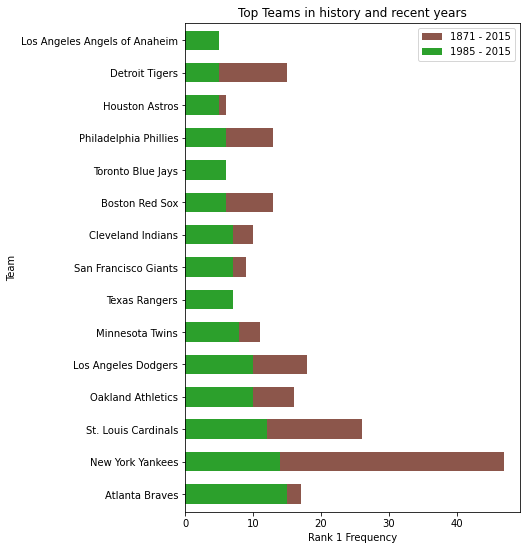

In [6]:
# See if top teams has changed 
# rank 1 frequency of teams in history (1871 - 2015)
print("\nColumns:", team.columns)
print("\nIndex:", team.index)
print("\nRank:\n", team.head()[['year', 'rank', 'team_id']])
topteams = team.groupby('year') # [['rank', 'team_id']].min()
# print("\nTop teams:\n", topteams.head())

rank_data = team[team["rank"] == 1][["year","team_id", "rank", "name"]]
print("\nRank Data:\n", rank_data.head())
top_team = rank_data["name"].value_counts()
#rank 1 frequency of teams recent years (1985 - 2015)
rank_data_recent = team[(team["rank"] == 1) & (team["year"] >= 1985)][["year","team_id", "rank", "name"]]
top_team_recent = rank_data_recent["name"].value_counts()
top_team = top_team.to_frame()
top_team_recent = top_team_recent.to_frame()
top_team["team"] = top_team.index
top_team_recent["team"] = top_team_recent.index
data = pd.merge(top_team, top_team_recent, on = ["team"], how = "right")
data = data.iloc[0:15]
data.index = data["team"]
data = data.drop("team",1)
print("\nData:\n", data)
data = data.rename(columns = {"name_x": "history","name_y":"recent"})
p1 = data["history"].plot.barh(figsize = (6,9), width = .6, color = sns.color_palette()[5])
p2 = data["recent"].plot.barh(figsize = (6,9), width = .6, color = sns.color_palette()[2])
_ = p2.set(xlabel = "Rank 1 Frequency", ylabel = "Team", title = "Top Teams in history and recent years")
_ = p2.legend(["1871 - 2015","1985 - 2015"])

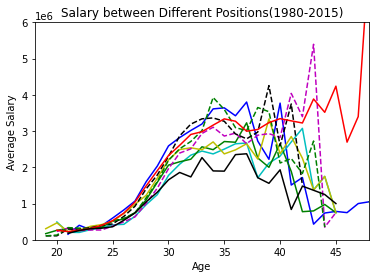

In [8]:
# Salary between different positions and age

warnings.filterwarnings('ignore')
player_position = pd.merge(salary, fielding, on = ["player_id","year"])[["year", "player_id", "salary", "pos"]]
player_position = pd.merge(player_position, player, on = ["player_id"], how = "left")[["year", "player_id","salary", "pos", "birth_year"]]
player_position["age"] = player_position["year"] - player_position["birth_year"] 
player_position = player_position[player_position.year >= 1980]
data = player_position.groupby(["age", "pos"]).mean()["salary"].unstack()
#plt.plot(data["1B"],  data["2B"], data["3B"], data["C"], data["CF"], data["LF"], data["P"], data["RF"], data["SS"])
plt.plot(data["1B"], 'b-', data["2B"], 'c-', data["3B"], 'g-', data["SS"], 'y-',data['LF'], 'm--', data['CF'], 'k--', data['RF'], 'g--', data['P'],'r-', data['C'],'k-')
_ = plt.xlabel("Age")
_ = plt.ylabel("Average Salary")

_ = plt.title("Salary between Different Positions(1980-2015)")
_ = plt.xlim([18,48])
_ = plt.ylim([0,6000000])

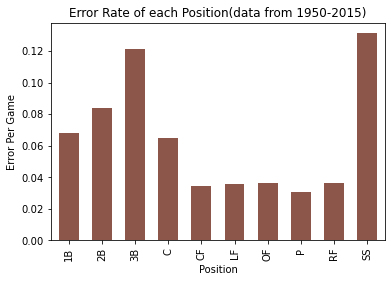

In [9]:
# Is there a most error prone position?
data = fielding[fielding["year"] >= 1950][["year","team_id","player_id","pos", "g","e"]]
data = data[data["g"] != 0]
data.loc[:,"error/game"] = data["e"]/data["g"]
error_data = data.groupby("pos").mean()["error/game"]
error_data = error_data.to_frame()
error_data = error_data.drop("DH")
p1 = error_data["error/game"].plot.bar(figsize = (6,4), width = .6, color = sns.color_palette()[5])
_ = p1.set(title = "Error Rate of each Position(data from 1950-2015)")
_ = p1.set(xlabel = "Position", ylabel = "Error Per Game")
# We can see that the most error prone position is SS followed by 3B
# generally speacking, OF are less error prone

In [14]:
# Are the best performers selected for all-star game?
# combine fielding and post-fielding (from 1933)
all_star = pd.read_csv("all_star.csv")[["player_id","year"]]
fielding = pd.read_csv("fielding.csv")
fielding_postseason = pd.read_csv("fielding_postseason.csv")
fielding = fielding[fielding["year"] >= 1933]
fielding_postseason = fielding_postseason[fielding_postseason["year"] >= 1933]
all_fielding = pd.concat([fielding, fielding_postseason], axis = 0)
all_fielding = all_fielding.groupby(["year","player_id"]).sum()[["g", "gs", "inn_outs", "po","a","e","dp","pb"]]
all_fielding = all_fielding.fillna(0)
# calculate fielding percentage: (Putouts + Assists) divided by (Putouts + Assists + Errors)
# po: Putouts / Pickoff ; a: Assist ; e: Error ; dp: Double Play; pb: Passed Balls
all_fielding["FP"] = (all_fielding["po"] + all_fielding["a"])/(all_fielding["po"] + all_fielding["a"] + all_fielding["e"])
# we don't consider those who participated less than mean_game
mean_game = all_fielding["g"].mean()
all_fielding = all_fielding[all_fielding["g"] >= mean_game]
# combine batting and batting_postseason
# ab: At Bats; bb: walk-to-strikeout ; double;  triple ; r : runs ; rbi :Run batted in　；
# h : hits ; hr : home run ; sb: Stolen bases; tb = 2*double + 3*triple + 4*home run
# g_idp : 	Double play ; cs : Caught Stealing
batting = pd.read_csv("batting.csv")
batting_postseason = pd.read_csv("batting_postseason.csv")
batting = batting[batting["year"] >= 1933]
batting_postseason = batting_postseason[batting_postseason["year"] >= 1933]
all_batting = pd.concat([batting, batting_postseason], axis = 0)
all_batting = all_batting.groupby(["year","player_id"]).sum()[["g","h", "double", "triple", "hr", "sb", "bb","ab","g_idp","cs"]]
all_batting = all_batting.fillna(0)
# Total Average = (h + double + 2*triple + 4*hr + sb + bb)/(ab - h + g_idp + cs)
all_batting["TA"] = (all_batting["h"] + all_batting["double"] + 2*all_batting["triple"] + 4*all_batting["hr"] + all_batting["sb"]+all_batting["bb"])/(all_batting["ab"]- all_batting["h"]+all_batting["g_idp"]+all_batting["cs"])
all_batting = all_batting[all_batting["g"] >= mean_game]
# combine pitching and pitching_postseason
pitching = pd.read_csv("pitching.csv")
pitching_postseason = pd.read_csv("pitching_postseason.csv")
pitching = pitching[pitching['year'] >= 1993]
pitching_postseason = pitching_postseason[pitching_postseason['year'] >= 1993]
all_pitching = pd.concat([pitching, pitching_postseason], axis = 0)
all_pitching.groupby(["year","player_id"])

# combine fielding percentage and batting average to determine the performance of a player
data1 = all_fielding["FP"]
data2 = all_batting["TA"]
data1 = data1.reset_index(level = ['year','player_id'])
data2 = data2.reset_index(level = ['year','player_id'])
data = pd.merge(data1, data2, on =['year','player_id'], how = 'inner')
data["Score"] = data['FP'] + data['TA']
year_range = list(range(1933, 2016))
percentage = pd.Series()
i = 0
for year in year_range:
    stars = all_star[all_star['year'] == year]
    star_count = len(stars.index)
    df = data[data['year'] == year]
    df = df.fillna(0)
    df = df[["year","player_id", "Score"]]
    df["rank"] = df['Score'].rank(ascending = False)
    df = df[np.isfinite(df['Score'])]
    df = df[df['rank'] <= 100]
    hs = set()
    count = 0
    for name in df["player_id"]:
        hs.add(name)
    for name in stars["player_id"]:
        if name in hs:
            count = count + 1
    percentage.set_value(i, count/star_count)
    i = i+1
plt.plot(year_range, percentage, color = sns.color_palette()[2])
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("How many All-Stars are from Top 100 Performance Players")
# There are several possible reasons for this situation:
# 1. The performance formula is not scientific
# 2. Because of Internet vote, all-star game players are selected for their fame rather than performance.

AttributeError: 'Series' object has no attribute 'set_value'

In [15]:
# Do players with a high ground into double play (GIDP) have a lower batting average?
# batting average = h/ab
warnings.filterwarnings('ignore')
batting = pd.read_csv("batting.csv")
batting_postseason = pd.read_csv("batting_postseason.csv")
all_batting = pd.concat([batting, all_batting], axis = 0)
all_batting = all_batting.groupby(["year","player_id"]).sum()[["ab", "h", "g_idp"]]
all_batting = all_batting[np.isfinite(all_batting['g_idp'])]
all_batting = all_batting[(all_batting["ab"] != 0) & (all_batting["g_idp"]!= 0)]
all_batting["batting_average"] = all_batting["h"]/all_batting["ab"]

from sklearn.linear_model import LinearRegression

algorithm = LinearRegression()
predictors = ["g_idp"]

#Initiate our algorithm class
algorithm = LinearRegression()
predictors = all_batting[predictors]
# The target we're using to train the algorithm.
target = all_batting["batting_average"]
# Training the algorithm using the predictors and target.
algorithm.fit(predictors, target)
print('Coefficients: \n', algorithm.coef_)
# From regression, we can see that the coefficient is not negative, thus the assumption is not appropriate

Coefficients: 
 [0.0053944]


Text(0.5, 1.0, "Players' G_IDP vs Batting Average")

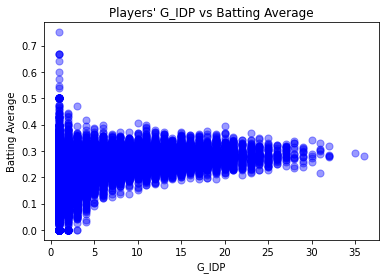

In [16]:
# Let's draw the scatter plot
s = 100
plt.scatter(predictors, target, color='b', s=s/2, alpha=.4)
plt.xlabel("G_IDP")
plt.ylabel("Batting Average")
plt.title("Players' G_IDP vs Batting Average")
# from the plot, there is no evidence that high g_idp will cause low batting average.
# However, the std of batting average decreases as G_IDP increases

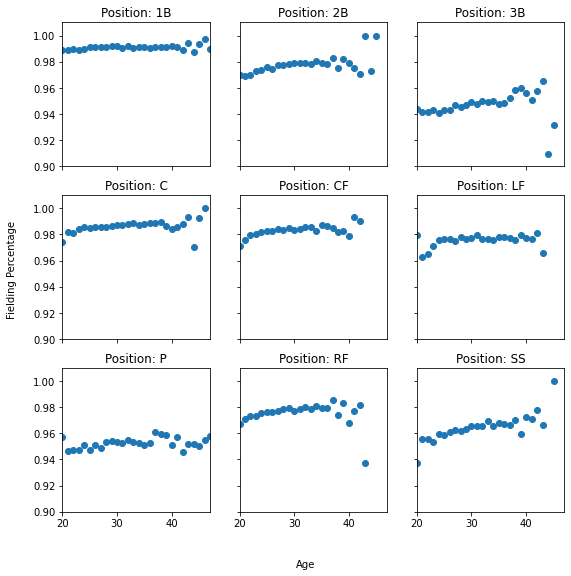

In [17]:
# When do players at different positions peak?
# 1. Consider Fielding Percentage
all_fielding = pd.concat([fielding, fielding_postseason], axis = 0)
all_fielding = pd.merge(all_fielding, player, on = ["player_id"], how = "left")[["year","g","player_id","birth_year","pos", "po","a","e"]]
all_fielding["age"] = all_fielding['year'] - all_fielding['birth_year']
all_fielding["FP"] = (all_fielding["po"] + all_fielding["a"])/(all_fielding["po"] + all_fielding["a"] + all_fielding["e"])
all_fielding = all_fielding[all_fielding["g"]>= 10]
all_fielding = all_fielding.groupby(["pos", "age"]).mean()[["FP"]]
all_fielding = all_fielding.reset_index(level=['pos', 'age'])
positions = ['1B', '2B', '3B', 'C', 'CF', 'LF', 'P', 'RF', 'SS']

fig, axes = plt.subplots(nrows=3, ncols=3, sharex = True, sharey = True, figsize=(9, 9))
fig.text(0.5, 0.04, 'Age', ha='center')
fig.text(0.04, 0.5, 'Fielding Percentage', va='center', rotation='vertical')
axes = axes.ravel()
for i in range(9):
    data = all_fielding[all_fielding["pos"] == positions[i]]
    axes[i].scatter(data["age"], data["FP"], color = sns.color_palette()[0])
    axes[i].set_xlim(20,47)
    axes[i].set_ylim(0.90, 1.01)
    axes[i].set_title("Position: " + positions[i])